# Supervised Machine Learning

In this lab, I use sklearn and statsmodel package to fit machine learning models for predictive and explainatory purposes.

## Machine Learning For Predictive Purposes
- KNN
- Logistic Regression
- SVM
- Naive Bayes
- Decision Tree
- Random Forest
- Gradient Boost

### Model Selection
- Grid Search
- General Ensembled Classifier

## Machine Learning For Explainatory Purposes
- Linear / Logistic Regression
- Permutation feature importance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


SyntaxError: invalid syntax (539283886.py, line 11)

SyntaxError: invalid syntax (510994209.py, line 1)

SyntaxError: invalid syntax (1697023450.py, line 1)

### The Customer Churn Data Set

This dataset is randomly collected from an Iranian telecom company databaseover a period of 12 months.

A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

**Attribute Information:**

- **Call Failures:** number of call failures
- **Complains:** binary (0: No complaint, 1: complaint)
- **Subscription Length:** **bold text**total months of subscription
- **Charge Amount:** Ordinal attribute (0: lowest amount, 9: highest amount)
- **Seconds of Use:** total seconds of calls
- **Frequency of use:** total number of calls
- **Frequency of SMS:** total number of text messages
- **Distinct Called Numbers:** total number of distinct phone calls
- **Age Group**: ordinal attribute (1: younger age, 5: older age)
- **Tariff Plan**: binary (1: Pay as you go, 2: contractual)
- **Status**: binary (1: active, 2: non-active)
- **Customer Value**: The calculated value of customer
- **Churn (Y)**: binary (1: churn, 0: non-churn) - **Class label**

## Data Understanding

In [2]:
import pandas as pd

data = pd.read_csv("customer_churn.csv")
data.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,191.920,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 320.0 KB


In [ ]:
## check missing values
pd.isna(data).sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
## check variable description
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,2165.280000,1.000000


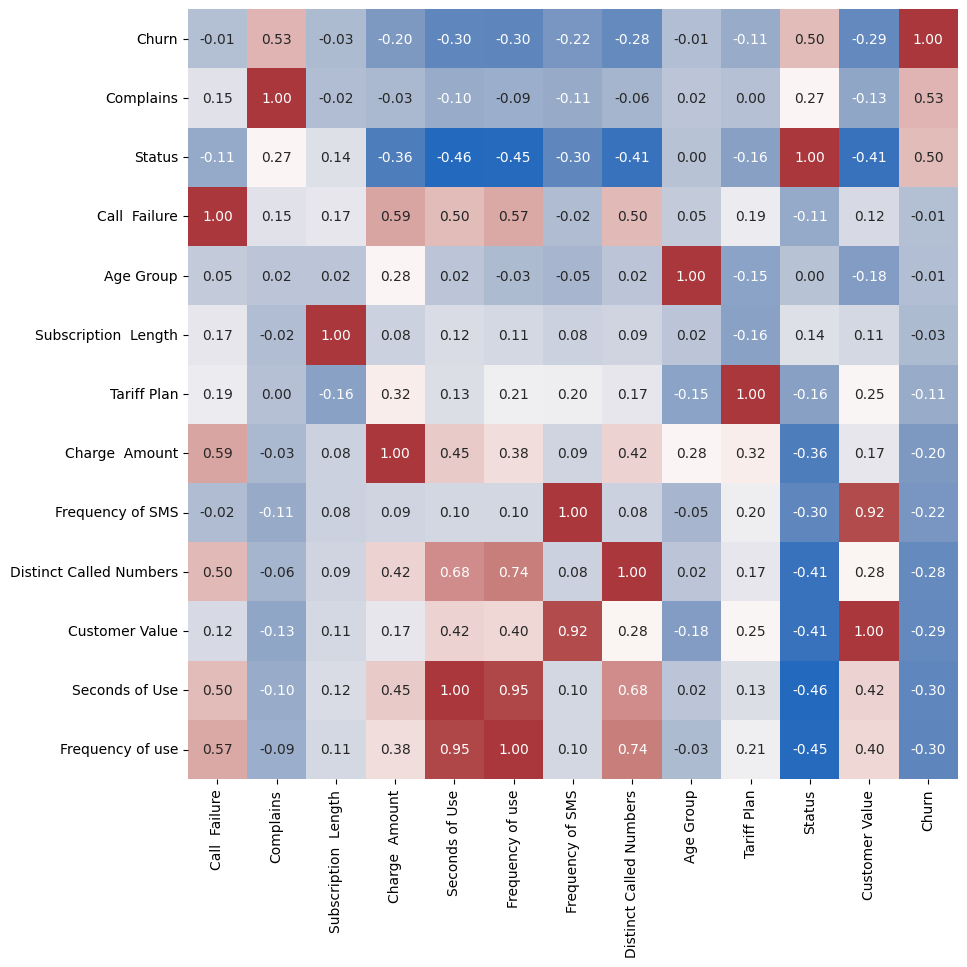

In [ ]:
## check variable correlation
corr_table = data.corr().sort_values("Churn", ascending=False)
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_table, cmap="vlag", annot=True, fmt='.2f', square=True, cbar=False)


High number of complaints, leading to the number of churns.

0    2655
1     495
Name: Churn, dtype: int64

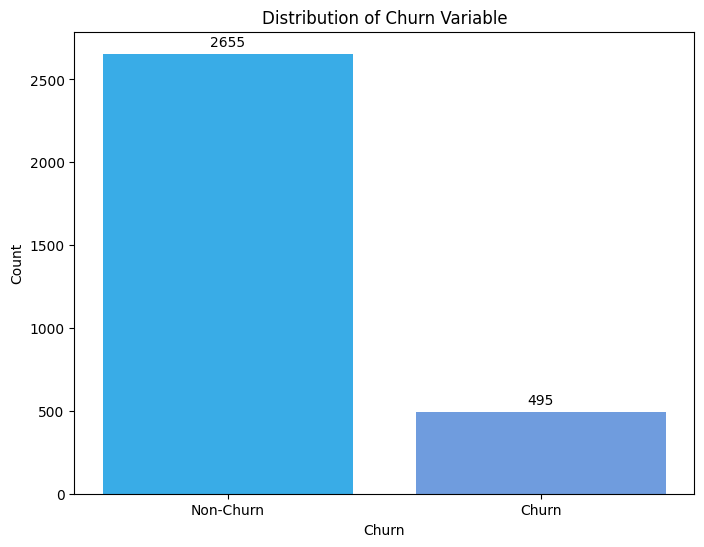

In [ ]:
## How the Y variable ("Churn") was distribute? I use the bar chart for this distribution.

import matplotlib.pyplot as plt

import pandas as pd

#1: Count the number of churned customers (1) and number of non-churned customers (2)

churn_counts = data['Churn'].value_counts()

#2: Create a bar plot

plt. figure(figsize=(8, 6))

# Define custom colors as hex codes
custom_colors = ['#39ace7', '#6f9cde']

bars = plt. bar(churn_counts.index, churn_counts.values, color =custom_colors)
plt. xlabel ('Churn')
plt. ylabel ('Count')
plt. title('Distribution of Churn Variable')
plt.xticks (churn_counts.index, ['Non-Churn','Churn']) #Customize x-axis labels


# Add labels with the count of churn distribution above the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

churn_counts


The predictive model is imbalanced, with as average of 83% customers are labeled as non-churn, which leads to the inaccurate prediction.

In [ ]:
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'Churn'],
      dtype='object')

In [ ]:
## let's randomly select 200 observations as next year's customer data for later use (to demostrate how we may use the predictive model)

next_year_index = np.random.choice(data.index, size=200, replace=False)   # randomly sample 200 obs from index without replacement
next_year = data.loc[next_year_index]

**replace=False:** ensures that each selected index is unique and not replaced, meaning that once an index is chosen, it cannot be chosen again in the same sample.


In [ ]:
## the data used for prediction

current_year_index = np.delete(data.index.values, next_year_index)
data2 = data.loc[current_year_index]

In [ ]:
len(data), len(data2), len(next_year)

(3150, 2950, 200)

## Data Prepare

In [ ]:
features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
            'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value']   # features / independent variables
target = ['Churn']     # target / dependent variable

# extract corresponding columns
X = data2[features].values
Y = data2[target].values.ravel()

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

- We could use the `train_test_split` (code as follow) process to properly evaluate our model, but the model's performance may vary based on how the dataset was "randomly" splited. So, here, we will use the `K-folder cross validation process` instead.  

```python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
```

## Make Predictions

### KNN

In [ ]:
from sklearn.model_selection import cross_validate     # import cross_validation function from sklearn
from sklearn.neighbors import KNeighborsClassifier    # import KNN classifer

knn = KNeighborsClassifier()

## fit with 5 folder cross validation

scores = cross_validate(estimator=knn, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.004358863830566407
Average Accuracy: 0.948135593220339


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_validate(estimator=lr, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.020760774612426758
Average Accuracy: 0.894915254237288


### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()

scores = cross_validate(estimator=svm, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.06866111755371093
Average Accuracy: 0.9220338983050848


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

scores = cross_validate(estimator=nb, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.0017807483673095703
Average Accuracy: 0.7254237288135593


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tree = DecisionTreeClassifier()

scores = cross_validate (estimator=tree, X=X, y=Y, scoring = "accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.020027351379394532
Average Accuracy: 0.9400000000000001


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

scores = cross_validate (estimator=rf, X=X, y=Y, scoring = "accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.7274065494537354
Average Accuracy: 0.9562711864406779


### Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

scores = cross_validate(estimator=gb, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.6920559406280518
Average Accuracy: 0.9403389830508473


## Model Selection

We can write a loop to search for the best model for the problem.

In [ ]:
## candidate models
knn = KNeighborsClassifier()
lr = LogisticRegression()
svm = SVC()
nb = GaussianNB()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models = {"KNN": knn, "LogisticRegression": lr, "SVM": svm,
          "Naive Bayes": nb, "DecisionTree": tree, "RandomForest": rf, "GradientBoost":gb}
results = []

for model_name, model in models.items():
    default = {"Model":model_name, "Fitting Time": np.nan, "Accuracy": np.nan}
    scores = cross_validate(estimator=model, X=X, y=Y, cv=5, scoring="accuracy")
    default['Fitting Time'] = scores['fit_time'].mean()
    default['Accuracy'] = scores['test_score'].mean()
    results.append(default)

In [ ]:
results = pd.DataFrame(results)
results.sort_values("Accuracy", ascending=False)

,Model,Fitting Time,Accuracy
5,RandomForest,0.830042,0.953559
6,GradientBoost,1.218198,0.940339
4,DecisionTree,0.029545,0.935593
1,LogisticRegression,0.049025,0.855254
2,SVM,0.158120,0.840000
0,KNN,0.004401,0.832881
3,Naive Bayes,0.008028,0.722373


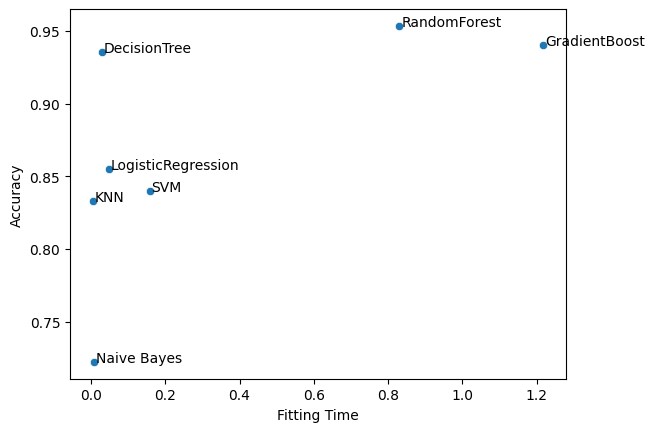

In [ ]:
### visualize the prediction

ax = sns.scatterplot(x="Fitting Time", y="Accuracy", data=results)
for x, y, model_name in results[['Fitting Time', 'Accuracy', 'Model']].values:
    ax.text(x+.005, y, model_name)

As we can see, the best model is the Random Forest model. We can either choose
1. fine tune the best model to get the best prediction result.
2. use a set of best model to generate an ensamble model for prediction.

### Next Step 1: Fine Tune the Best Model

In [ ]:
from sklearn.model_selection import GridSearchCV    ## use cross validation to search for best model hyper-parameters

# Define model
rf = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 15],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, Y)

# Print best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
Best score:  0.9545762711864407


- As we can see, the fine tuned RF model is 0.004 higher in accuracy than the RF model with default parameters.

### Next Step 2: General Ensembled Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
tree = DecisionTreeClassifier()

vc = VotingClassifier(estimators=[("RandomForest", rf),
                                  ("KNN", knn),
                                  ("GradientBoost", gb),
                                  ("DecisionTree", tree)],
                                  voting="soft", weights=[3,1,1,1])

scores = cross_validate(estimator=vc, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 1.1113714218139648
Average Accuracy: 0.9505084745762712


- The generalized ensamble model is also 0.002 higher in accuracy than the RF model with default parameters.

## Apply the Best Model to Improve Customer Retention

- Since the fine turned RF model yields the best performance, we will apply it to predict the churn for next year's customers.

In [ ]:
## Apply the same data preprocessing to the next year's data

from sklearn.preprocessing import StandardScaler

features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
            'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value']   # features / independent variables
target = ['Churn']     # target / dependent variable

# extract corresponding columns
X2 = next_year[features].values
Y2 = next_year[target].values.ravel()

## standardize features
X2 = StandardScaler().fit_transform(X2)

In [ ]:
rf = RandomForestClassifier (n_estimators=200, max_depth= None, criterion = "entropy")
rf.fit (X,Y)

y_pred = rf.predict(X2)

In [ ]:
next_year['pred_churn'] = y_pred  # map the prediction back to the dataset

In [ ]:
## sort customer based on churn and their customer value
mask = next_year['pred_churn'] == 1
next_year[mask].sort_values(["pred_churn", "Customer Value"], ascending=False).head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,pred_churn
2124,18,0,38,2,6123,104,33,26,2,1,1,428.715,0,1
1324,13,0,40,1,5773,102,34,28,2,1,1,417.375,0,1
74,16,0,38,2,5878,101,31,26,2,1,1,408.555,0,1
2224,15,0,36,1,6063,101,28,24,2,1,1,403.380,0,1
1174,5,1,32,0,5453,89,14,20,2,1,1,312.390,1,1
677,11,1,36,0,2458,45,43,34,3,1,2,272.120,1,1
524,9,1,36,0,5218,88,5,9,2,1,1,261.270,1,1
77,12,1,38,1,2328,47,39,33,3,1,1,251.000,1,1
2586,12,1,37,0,2570,60,66,37,4,1,2,230.750,1,1
2027,4,1,34,0,1963,38,27,29,3,1,2,188.040,1,1


- Then, as data scientist, we can ask the customer service department to call these customers who are likely to leave to improve their retetion.
- The call can take turn based on the customer value, in which high value customers get higher priority.

## Machine Learning For Explainatory Purposes

## Solution 1: Use Linear/Logistic Regressions

In [ ]:
import statsmodels.api as sm

In [ ]:
features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
            'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value']   # features / independent variables
target = ['Churn']     # target / dependent variable

# extract corresponding columns
X3 = data[features]
Y3 = data[target]

## standardize features
X3 = pd.DataFrame(StandardScaler().fit_transform(X3), columns=X3.columns)   ## we need to standardize all the features to make the coefficient compariable
X3['constant'] = 1

In [ ]:
logit_model = sm.Logit(Y3, X3)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.219861
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3150
Model:                          Logit   Df Residuals:                     3137
Method:                           MLE   Df Model:                           12
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.4945
Time:                        15:21:44   Log-Likelihood:                -692.56
converged:                       True   LL-Null:                       -1369.9
Covariance Type:            nonrobust   LLR p-value:                7.893e-283
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Call  Failure               0.9540      0.129      7.394      0.000       0.701       1.207
Complains                   1.0745      0.075     14.320      0.000       0.927       1.222
Subscription  Length       -0.2567      0.082     -3.149      0.002      -0.416      -0.097
Charge  Amount             -0.6318      0.183     -3.448      0.001      -0.991      -0.273
Seconds of Use              0.4704      0.595      0.790      0.429      -0.696       1.637
Frequency of use           -3.1744      0.487     -6.518      0.000      -4.129      -2.220
Frequency of SMS           -5.2513      1.365     -3.848      0.000      -7.926      -2.577
Distinct Called Numbers    -0.1907      0.166     -1.150      0.250      -0.516       0.134
Age Group                   0.1067      0.099      1.077      0.281      -0.087       0.301
Tariff Plan                 0.0643      0.169      0.381      0.703      -0.266       0.395
Status                      0.6085      0.087      7.013      0.000       0.438       0.779
Customer Value              4.2351      1.449      2.922      0.003       1.395       7.076
constant                   -3.5025      0.186    -18.803      0.000      -3.868      -3.137
===========================================================================================
"""

## Use Permutation feature importance

The `permutation feature importance` is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

In [ ]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(class_weight = 'balanced_subsample',
                            criterion= 'entropy',
                            max_depth= None,
                            n_estimators = 500)
rf.fit(X, Y)

results = permutation_importance(rf, X, Y, n_repeats=10)

In [ ]:
results

{'importances_mean': array([0.01888136, 0.04962712, 0.03725424, 0.00122034, 0.04125424,
        0.05450847, 0.0120339 , 0.02677966, 0.02176271, 0.        ,
        0.06176271, 0.02772881]),
 'importances_std': array([0.00105085, 0.00123345, 0.00253422, 0.00064674, 0.00196522,
        0.00361871, 0.0012524 , 0.0031509 , 0.00227801, 0.        ,
        0.00280272, 0.00136269]),
 'importances': array([[0.01762712, 0.02      , 0.01830508, 0.0179661 , 0.01830508,
         0.01966102, 0.01864407, 0.02      , 0.01762712, 0.02067797],
        [0.05050847, 0.05084746, 0.05084746, 0.04983051, 0.04711864,
         0.04983051, 0.04949153, 0.04779661, 0.04915254, 0.05084746],
        [0.03762712, 0.03728814, 0.03559322, 0.03864407, 0.03694915,
         0.03694915, 0.04135593, 0.03423729, 0.04101695, 0.03288136],
        [0.0020339 , 0.        , 0.00101695, 0.00169492, 0.0020339 ,
         0.00101695, 0.00135593, 0.00033898, 0.00101695, 0.00169492],
        [0.04135593, 0.04033898, 0.03830508, 0.041

In [ ]:
## rearrange the results as dataframe
results2 = pd.DataFrame({"Feature Importance": results['importances_mean'],
                       "STD": results['importances_std']}, index=features)
results2.sort_values("Feature Importance", inplace=True, ascending=False)
results2

,Feature Importance,STD
Status,0.061797,0.002197
Complains,0.054102,0.001584
Frequency of use,0.053119,0.002249
Seconds of Use,0.042508,0.002687
Subscription Length,0.039017,0.002048
Distinct Called Numbers,0.033051,0.003235
Customer Value,0.025220,0.002821
Age Group,0.023525,0.001995
Call Failure,0.018542,0.001462
Frequency of SMS,0.012102,0.001661


- Generate a horizontal bar plot to show the feature importance of different features in determining the customer churn.

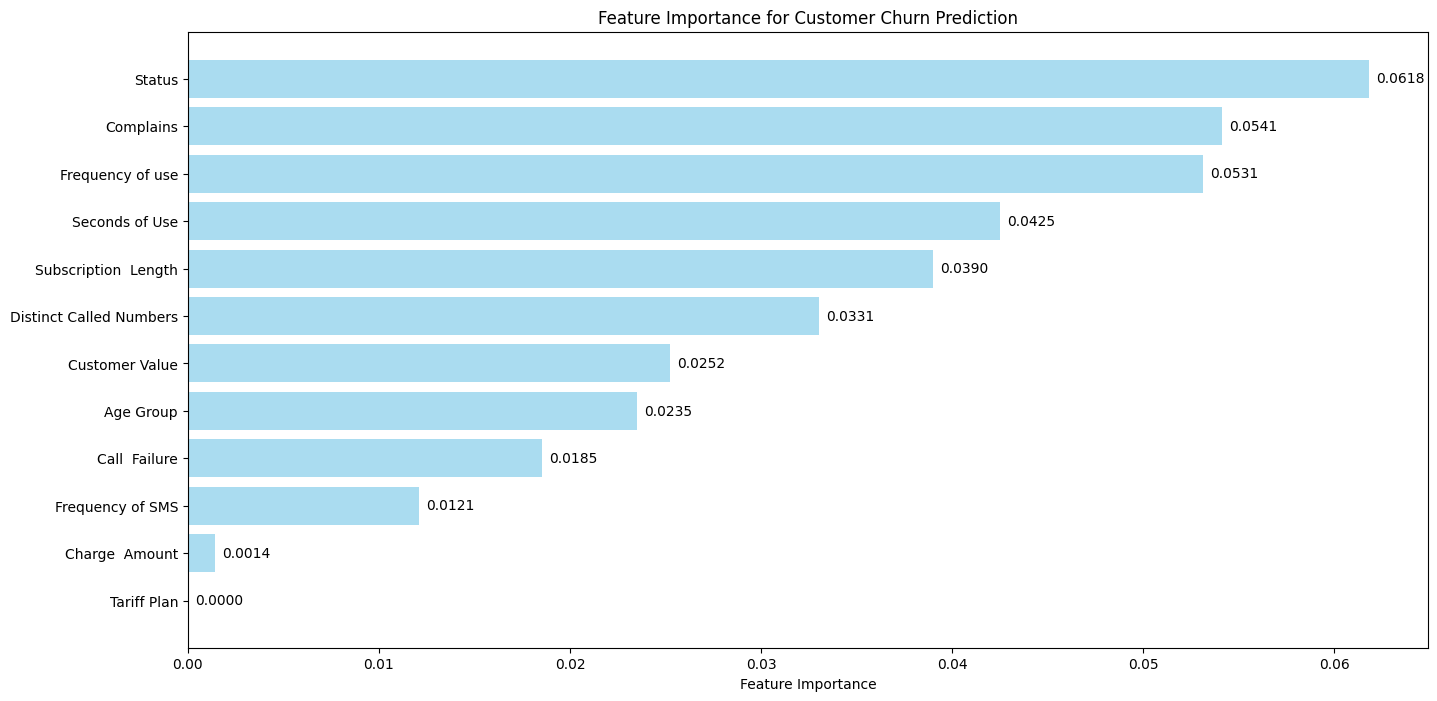

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with feature importance data
results2 = pd.DataFrame({"Feature Importance": results['importances_mean'],
                       "STD": results['importances_std']}, index=features)

# Sort the DataFrame by Feature Importance in descending order
results2.sort_values("Feature Importance", inplace=True, ascending=False)

# Create a horizontal bar plot without displaying the blackline
plt.figure(figsize=(16, 8))
bars = plt.barh(results2.index, results2['Feature Importance'], color='skyblue', alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Customer Churn Prediction')

# Add feature importance values to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.4f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(5, 0),
                 textcoords='offset points', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

Customer status is the most important factors leading to predict customers churn.